### Random Forest and Logistic Regression  Model for Thyroid Disease Classification


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the preprocessed dataset
file_path = r"C:\Users\saran\OneDrive\Documents\preprocessed_thyroid_data.csv"  # Use raw string for Windows paths
preprocessed_data = pd.read_csv(file_path)




In [19]:

# Step 2: Define features and target
X = preprocessed_data.drop(columns=['target'])  # Features
y = preprocessed_data['target']  # Target variable

# Step 3: Split into 70% training + 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Step 4: Split the temporary set into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Step 5: Print the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5376, 10) (5376,)
Validation set shape: (1152, 10) (1152,)
Test set shape: (1153, 10) (1153,)


                                          Using Random Forest Model

In [20]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

#Preview the dataset
print("First 5 rows of the dataset:")
print(preprocessed_data.head())

# Check the shape and missing values
print("Dataset Shape:", preprocessed_data.shape)
print("Missing Values:")
print(preprocessed_data.isnull().sum())

# Define features (X) and target variable (y)
X = preprocessed_data.drop(columns=['target'])  # Drop the 'target' column to create feature set
y = preprocessed_data['target']  # 'target' column is the target variable

#Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

#Train Random Forest with hyperparameter tuning using RandomizedSearchCV

# Define the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 10),  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, 
                                      n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the Random Forest model
random_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf_classifier = random_search_rf.best_estimator_

#  Evaluate the model on the validation set

# Predict on validation set
y_val_pred_rf = best_rf_classifier.predict(X_val)

# Print evaluation results
print("\nRandom Forest Evaluation on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_rf)}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))

#Evaluate the model on the test set

# Predict on test set
y_test_pred_rf = best_rf_classifier.predict(X_test)

# Print evaluation results
print("\nRandom Forest Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))



First 5 rows of the dataset:
   TSH    TT4  FTI  sex   TBG  on_thyroxine  query_hypothyroid  psych  \
0  0.3    0.0  0.0    0   0.0             0                  1      0   
1  1.6  128.0  0.0    0   0.0             0                  0      0   
2  0.0    0.0  0.0    0  11.0             0                  0      0   
3  0.0    0.0  0.0    0  26.0             0                  0      0   
4  0.0    0.0  0.0    0  36.0             0                  0      0   

   query_hyperthyroid  TBG_measured  target  
0                   0             0       1  
1                   0             0       1  
2                   1             1       1  
3                   0             1       1  
4                   0             1       2  
Dataset Shape: (7681, 11)
Missing Values:
TSH                   0
TT4                   0
FTI                   0
sex                   0
TBG                   0
on_thyroxine          0
query_hypothyroid     0
psych                 0
query_hyperthyroid    

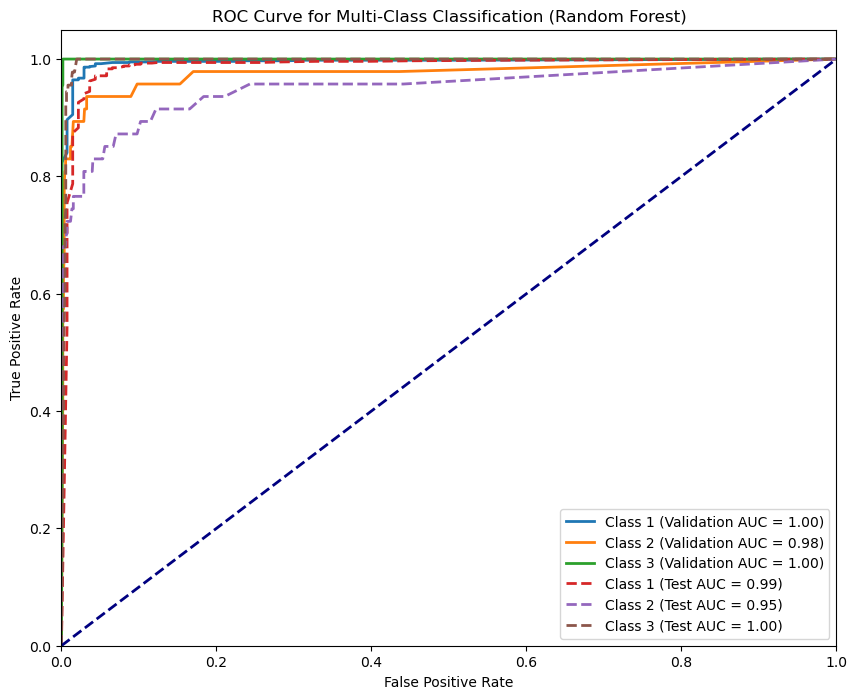

In [16]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class classification
y_val_binarized = label_binarize(y_val, classes=[1, 2, 3])
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

# Get predicted probabilities for the validation and test sets
y_val_prob_rf = best_rf_classifier.predict_proba(X_val)
y_test_prob_rf = best_rf_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr_val, tpr_val, roc_auc_val = {}, {}, {}
fpr_test, tpr_test, roc_auc_test = {}, {}, {}

for i in range(3):  # For each class (1, 2, 3)
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_binarized[:, i], y_val_prob_rf[:, i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob_rf[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curves for validation and test sets
plt.figure(figsize=(10, 8))

# ROC curve for Validation Set
for i in range(3):
    plt.plot(fpr_val[i], tpr_val[i], lw=2, label=f'Class {i+1} (Validation AUC = {roc_auc_val[i]:.2f})')

# ROC curve for Test Set
for i in range(3):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, linestyle='--', label=f'Class {i+1} (Test AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Random Forest)')
plt.legend(loc="lower right")
plt.show()


                                                          Using Logistic Regression Model 

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import loguniform



# Preview the dataset
print("First 5 rows of the dataset:")
print(preprocessed_data.head())

#  Check the shape and missing values
print("Dataset Shape:", preprocessed_data.shape)
print("Missing Values:")
print(preprocessed_data.isnull().sum())

# Define features (X) and target variable (y)
X = preprocessed_data.drop(columns=['target'])  # Drop the 'target' column to create feature set
y = preprocessed_data['target']  # 'target' column is the target variable

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Resample the training data using SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#  Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'C': loguniform(1e-4, 1e4),  # Regularization strength (log-uniform distribution)
    'penalty': ['l1', 'l2'],  # Regularization type: L1 or L2
}
lr_classifier = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_lr = RandomizedSearchCV(estimator=lr_classifier, param_distributions=param_dist, 
                                      n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the model
random_search_lr.fit(X_train_scaled, y_train_resampled)

# Best model from RandomizedSearchCV
best_lr_classifier = random_search_lr.best_estimator_

# Step 9: Evaluate the model on the validation set
y_val_pred = best_lr_classifier.predict(X_val_scaled)

# Validation set results
print("\nLogistic Regression Evaluation on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

#  Evaluate the model on the test set
y_test_pred = best_lr_classifier.predict(X_test_scaled)

# Test set results
print("\nLogistic Regression Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


First 5 rows of the dataset:
   TSH    TT4  FTI  sex   TBG  on_thyroxine  query_hypothyroid  psych  \
0  0.3    0.0  0.0    0   0.0             0                  1      0   
1  1.6  128.0  0.0    0   0.0             0                  0      0   
2  0.0    0.0  0.0    0  11.0             0                  0      0   
3  0.0    0.0  0.0    0  26.0             0                  0      0   
4  0.0    0.0  0.0    0  36.0             0                  0      0   

   query_hyperthyroid  TBG_measured  target  
0                   0             0       1  
1                   0             0       1  
2                   1             1       1  
3                   0             1       1  
4                   0             1       2  
Dataset Shape: (7681, 11)
Missing Values:
TSH                   0
TT4                   0
FTI                   0
sex                   0
TBG                   0
on_thyroxine          0
query_hypothyroid     0
psych                 0
query_hyperthyroid    

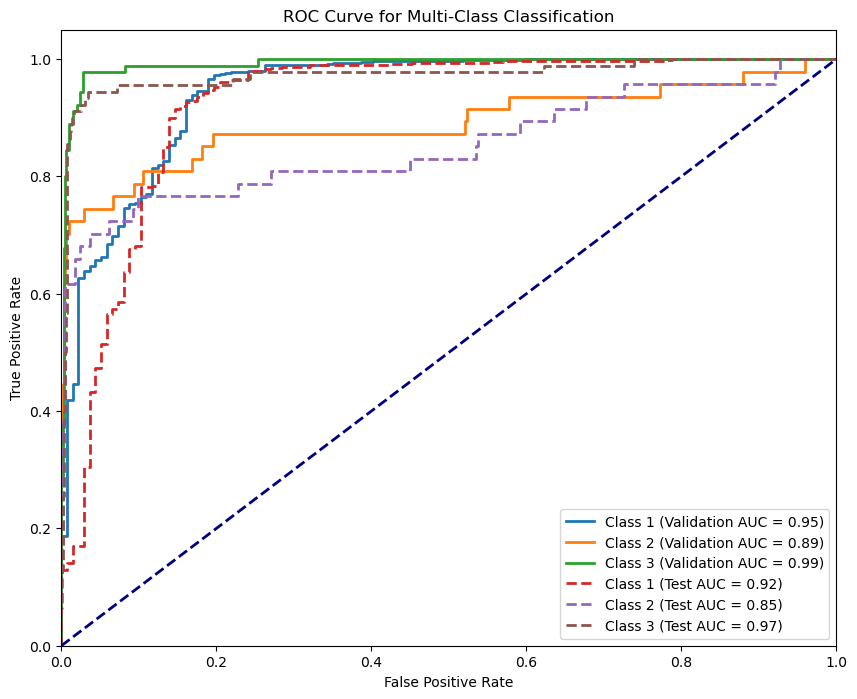

In [15]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class classification
y_val_binarized = label_binarize(y_val, classes=[1, 2, 3])
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

# Get predicted probabilities for the validation and test sets
y_val_prob = best_lr_classifier.predict_proba(X_val_scaled)
y_test_prob = best_lr_classifier.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr_val, tpr_val, roc_auc_val = {}, {}, {}
fpr_test, tpr_test, roc_auc_test = {}, {}, {}

for i in range(3):  # For each class (1, 2, 3)
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_binarized[:, i], y_val_prob[:, i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curves for validation and test sets
plt.figure(figsize=(10, 8))

# ROC curve for Validation Set
for i in range(3):
    plt.plot(fpr_val[i], tpr_val[i], lw=2, label=f'Class {i+1} (Validation AUC = {roc_auc_val[i]:.2f})')

# ROC curve for Test Set
for i in range(3):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, linestyle='--', label=f'Class {i+1} (Test AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


                                                 Comparison of both Models 

In [22]:
# Random Forest Evaluation
y_val_pred_rf = best_rf_classifier.predict(X_val)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
y_test_pred_rf = best_rf_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Logistic Regression Evaluation
y_val_pred_lr = best_lr_classifier.predict(X_val_scaled)
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
y_test_pred_lr = best_lr_classifier.predict(X_test_scaled)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

# Print the comparison
print("Model Accuracy Comparison:")
print(f"Validation Accuracy - Random Forest: {val_accuracy_rf:.2f}, Logistic Regression: {val_accuracy_lr:.2f}")
print(f"Test Accuracy - Random Forest: {test_accuracy_rf:.2f}, Logistic Regression: {test_accuracy_lr:.2f}")


Model Accuracy Comparison:
Validation Accuracy - Random Forest: 0.98, Logistic Regression: 0.88
Test Accuracy - Random Forest: 0.98, Logistic Regression: 0.88


The Random Forest model demonstrated superior performance with a validation accuracy of 98.44% and a test accuracy of 98.01%, significantly outperforming the Logistic Regression model, which achieved a validation accuracy of 88.11% and a test accuracy of 88.46%. Random Forest's ability to handle non-linear relationships and capture complex patterns in the data gave it a clear advantage. Despite applying SMOTE and feature scaling, Logistic Regression struggled with class imbalance and was less effective in modeling the dataset's intricacies. While Logistic Regression is simpler and interpretable, Random Forest emerged as the more robust and accurate model for this classification problem.

                                                    Comaparison of all the models 

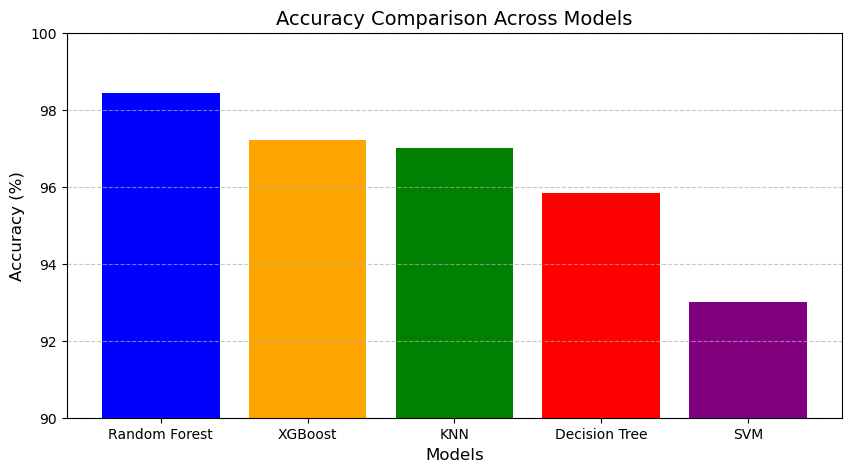

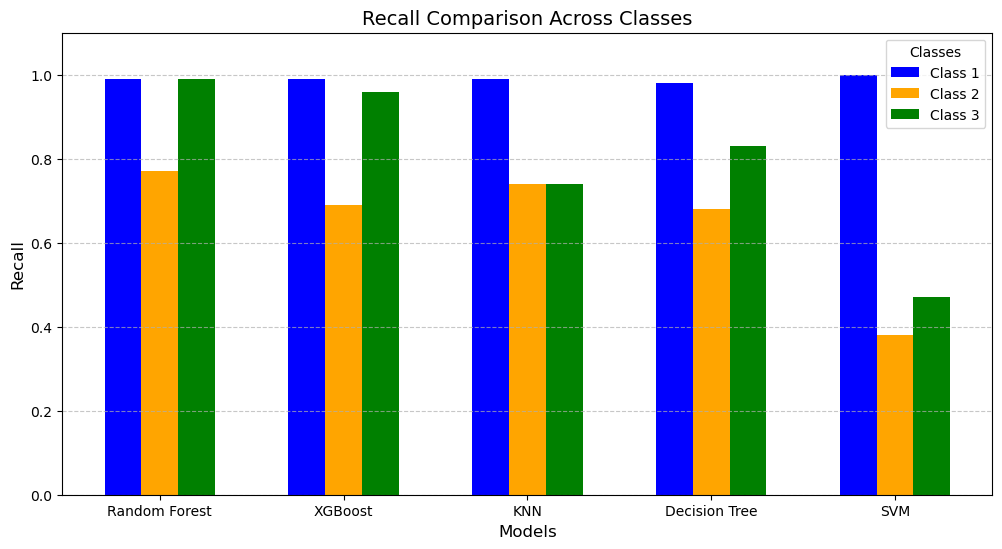

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'XGBoost', 'KNN', 'Decision Tree', 'SVM']
accuracy = [98.44, 97.22, 97.0, 95.83, 93.0]

recall_class1 = [0.99, 0.99, 0.99, 0.98, 1.00]
recall_class2 = [0.77, 0.69, 0.74, 0.68, 0.38]
recall_class3 = [0.99, 0.96, 0.74, 0.83, 0.47]

# Plot 1: Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy Comparison Across Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(90, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Recall Comparison Across Classes
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - width, recall_class1, width, label='Class 1', color='blue')
plt.bar(x, recall_class2, width, label='Class 2', color='orange')
plt.bar(x + width, recall_class3, width, label='Class 3', color='green')

plt.title('Recall Comparison Across Classes', fontsize=14)
plt.ylabel('Recall', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend(title='Classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
